In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
trainData_df = pd.read_csv('train.csv')
trainData_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
trainData_df.shape

(43957, 15)

<AxesSubplot:xlabel='count', ylabel='native-country'>

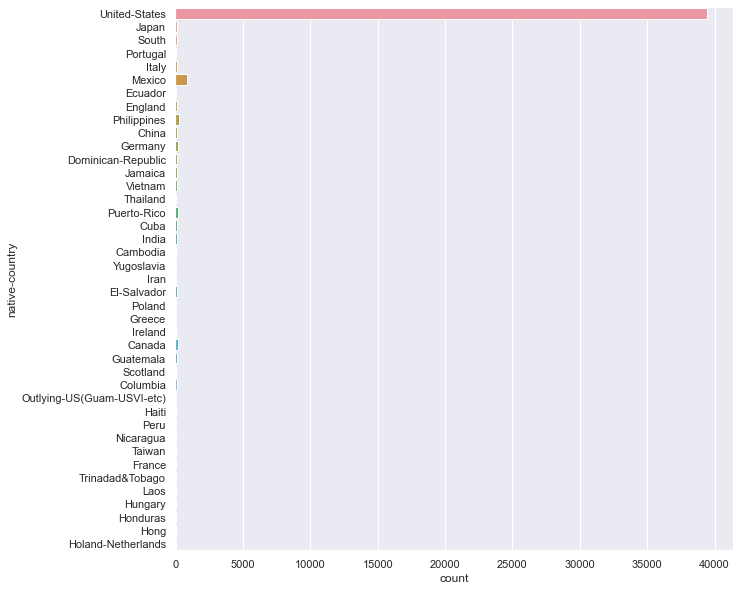

In [5]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,10))
sns.countplot(data= trainData_df, y = 'native-country')

In [6]:
# Since majority of the records are from United-States we are only taking those records into further consideration.
trainData_df = trainData_df.dropna()
trainData_df = trainData_df[trainData_df['native-country'] == 'United-States']
# trainData_df = trainData_df.drop('native-country', axis = 1)
trainData_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [7]:
trainData_df['workclass'].value_counts()

Private             27181
Self-emp-not-inc     3146
Local-gov            2650
State-gov            1624
Self-emp-inc         1359
Federal-gov          1189
Without-pay            19
Name: workclass, dtype: int64

<AxesSubplot:xlabel='workclass', ylabel='count'>

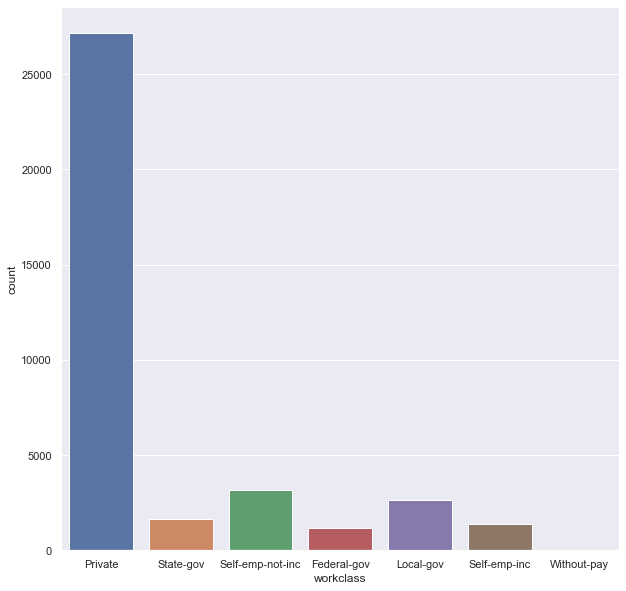

In [8]:
sns.set_theme(style="darkgrid")
#frequency distribution of work class
plt.figure(figsize=(10,10))
sns.countplot(data= trainData_df, x = trainData_df['workclass'])
# From the below graph people from Without-pay class are are very less in count thus we can drop them

In [9]:
trainData_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [10]:
# Dropping workclass = Without-pay since there is no significant count.
trainData_df.drop(trainData_df.index[trainData_df['workclass'] == 'Without-pay'], inplace=True)
trainData_df.shape

(37149, 15)

In [11]:
trainData_df['workclass'].value_counts()

Private             27181
Self-emp-not-inc     3146
Local-gov            2650
State-gov            1624
Self-emp-inc         1359
Federal-gov          1189
Name: workclass, dtype: int64

<AxesSubplot:xlabel='count', ylabel='education'>

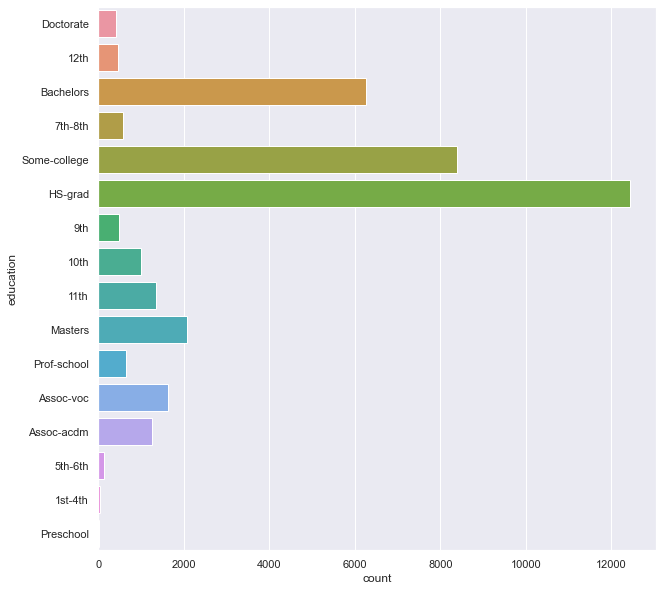

In [12]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,10))
sns.countplot(data= trainData_df, y = 'education')

In [13]:
# trainData_df['education'] = trainData_df['education'].replace(['1st-4th','5th-6th'],'elementary-school')
# trainData_df['education'] = trainData_df['education'].replace(['7th-8th'],'middle-school')
# trainData_df['education'] = trainData_df['education'].replace(['9th','10th','11th','12th'],'high-school')
# trainData_df['education'] = trainData_df['education'].replace(['Doctorate','Bachelors','Some-college','Masters','Prof-school','Assoc-voc','Assoc-acdm'],'postsecondary-education')

In [14]:
# sns.set_theme(style="darkgrid")

# plt.figure(figsize=(10,10))
# sns.countplot(data= trainData_df, y = 'education')

<AxesSubplot:xlabel='count', ylabel='occupation'>

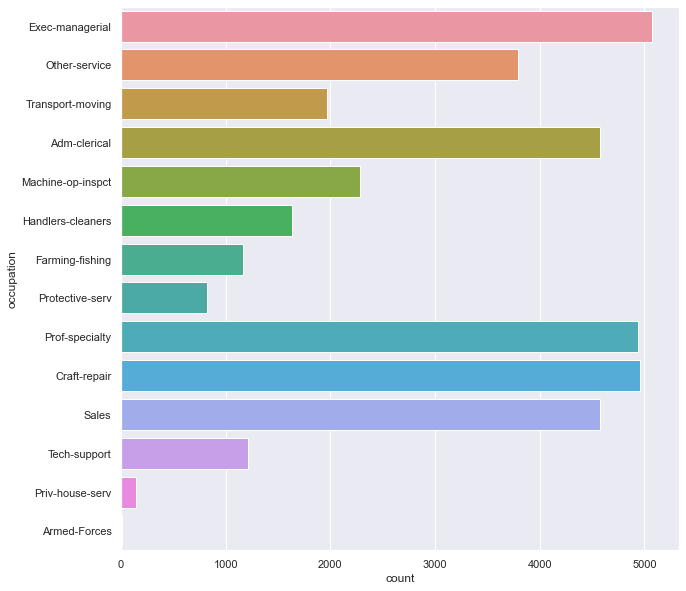

In [15]:
plt.figure(figsize=(10,10)) 
sns.countplot(data= trainData_df, y = "occupation")

In [16]:
trainData_df['occupation'].value_counts()

Exec-managerial      5076
Craft-repair         4958
Prof-specialty       4941
Adm-clerical         4577
Sales                4576
Other-service        3795
Machine-op-inspct    2284
Transport-moving     1963
Handlers-cleaners    1630
Tech-support         1209
Farming-fishing      1169
Protective-serv       818
Priv-house-serv       141
Armed-Forces           12
Name: occupation, dtype: int64

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

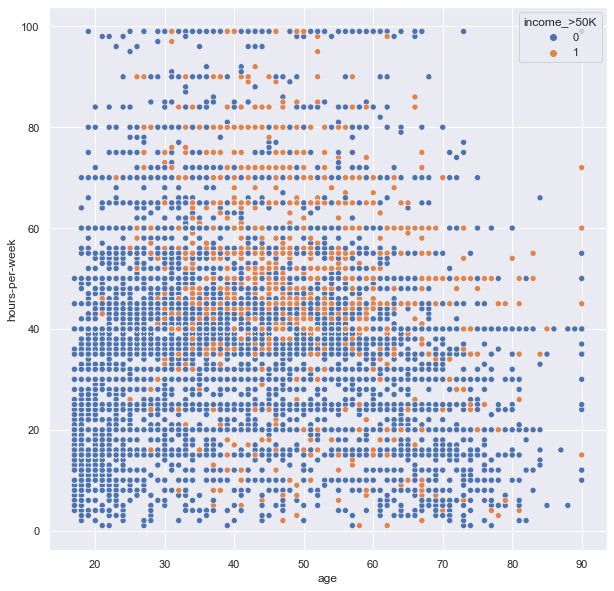

In [17]:
plt.figure(figsize=(10,10)) 
sns.scatterplot(data= trainData_df, x = 'age', y = 'hours-per-week', hue = 'income_>50K')

In [18]:
# Categorical Data
trainData_categorical = trainData_df.select_dtypes(include=['object']).columns
# onehot encoding to deal with categorical data
categorical_df=pd.get_dummies(trainData_df[trainData_categorical])
categorical_df.shape
categorical_df.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_United-States
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1


In [19]:
# numerical data
num_columns = [ column for column in list(trainData_df.columns) if trainData_df[column].dtype 
               !='object'  and  column != 'income_>50K']
num_columns

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [20]:
# Combining categorical and numerical data, creating the final df which will be use in classifiers.
finalData_df = pd.DataFrame()
finalData_df = pd.concat([categorical_df , trainData_df[num_columns] , trainData_df['income_>50K'] ] , axis = 1)
finalData_df.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_United-States,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,67,366425,16,99999,0,60,1
1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,17,244602,8,0,0,15,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,31,174201,13,0,0,40,1
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,58,110199,4,0,0,40,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,25,149248,10,0,0,40,0


In [21]:
x=finalData_df.drop(['income_>50K'],axis=1)
y=finalData_df['income_>50K']

In [22]:
# x

In [23]:
# y

In [24]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 1) 

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, max_depth = 15, max_features = 'auto',random_state = 0)
classifier.fit(x_train, y_train)
y_pred_test = classifier.predict(x_test) 

In [26]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred_test)) 

[[7903  446]
 [1132 1664]]


In [27]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred_test)
print("Accuracy for this model {} %".format(acc*100))

Accuracy for this model 85.84118438761776 %


In [28]:
score = cross_val_score(classifier, x_train, y_train, cv = 10)
print('Accuracy of RandomForestClassifier using cross validation: %0.2f (+/- %0.2f)' % 
      (score.mean(), score.std() * 2))

Accuracy of RandomForestClassifier using cross validation: 0.86 (+/- 0.01)


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [30]:
from sklearn.svm import SVC
classifier1= SVC(kernel='rbf',decision_function_shape='ovr',max_iter=9000)
classifier1.fit(X_train,y_train)

/Users/viveksagarreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=9000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(max_iter=9000)

In [31]:
y_pred_test1 = classifier1.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred_test1))

[[7710  639]
 [1248 1548]]


In [33]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred_test1)
print("Accuracy for this model {} %".format(acc*100))

Accuracy for this model 83.0686406460296 %


In [34]:
score = cross_val_score(classifier1, X_train, y_train, cv = 10)
print('Accuracy of SVC using cross validation: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

/Users/viveksagarreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=9000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/viveksagarreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=9000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/viveksagarreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=9000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/viveksagarreddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=9000).  Cons

Accuracy of SVC using cross validation: 0.83 (+/- 0.02)


In [35]:
from sklearn.naive_bayes import GaussianNB
classifier2 = GaussianNB()
classifier2.fit(x_train,y_train)
y_pred_test2 = classifier2.predict(x_test) 

In [36]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred_test2))

[[7893  456]
 [1931  865]]


In [37]:
acc = accuracy_score(y_test,y_pred_test2)
print("Accuracy for this model {} %".format(acc*100))

Accuracy for this model 78.58232391206819 %


In [38]:
score = cross_val_score(classifier2, x_train, y_train, cv = 10)
print('Accuracy of SVC using cross validation: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

Accuracy of SVC using cross validation: 0.78 (+/- 0.01)
